In [181]:
import svgling

# Overview of `svgling`

### Kyle Rawlins, [kgr@jhu.edu](kgr@jhu.edu)

This package is a pure python package for rendering linguistics-style (constituent) trees in SVG. It accepts trees defined in terms of lists of lists (really, anything indexable) and strings, as well as `nltk.Tree` objects (or anything with the same API).

For convenient use in Jupyter notebooks, the main function to try is `svgling.draw_tree`:

In [218]:
svgling.draw_tree(("S", "NP", "VP"))

## Spacing options

By default, `svgling` will attempt to adjust *horizontal spacing* based on the lengths of leaf nodes in a subtree. This typically produces the best results for natural language syntax trees. *Vertical spacing*, on the other hand, is for the most part a constant between-node value.

Because `svgling` does (for now) only single-pass rendering, with no javascript, some of the spacing options may involve a certain amount of heuristic adjustment (because it is impossible to know exact text sizes before actually rendering them to a device). Please let me know if you find spacing bugs and I'll try to address them.

Here are two somewhat more interesting trees, defined as lists, and various rendering options demonstrated on those trees.

In [183]:
t0 = ("S", ("NP", "D", "N"), ("VP", "V", ("NP", "D", "N")))
t1 = ("S", ("NP", ("D", "the"), ("N", "rhinocerous")), ("VP", ("V", "saw"), ("NP", ("D", "the"), ("N", "elephant"))))

Here are the default settings, which use text-width-based spacing (`HorizOptions.TEXT`):

In [184]:
svgling.draw_tree(t0)

In [185]:
svgling.draw_tree(t1)

To customize the tree layout, you provide a `svgling.core.TreeOptions` object. Here are the two above trees rendered using even spacing. Without manual adjustment, this may cut off longer words, but it can look better for abstract trees with similar-width leaf nodes.

In [186]:
svgling.draw_tree(t0, options=svgling.core.TreeOptions(horiz_spacing=svgling.core.HorizOptions.EVEN, leaf_padding=4))

In [187]:
svgling.draw_tree(t1, options=svgling.core.TreeOptions(horiz_spacing=svgling.core.HorizOptions.EVEN, leaf_padding=6))

The third mode uses leaf node count, irrespective of the length of the contents of the leaf node, to adjust horizontal spacing.

In [188]:
svgling.draw_tree(t0, options=svgling.core.TreeOptions(horiz_spacing=svgling.core.HorizOptions.NODES, leaf_padding=3))

In [189]:
svgling.draw_tree(t1, options=svgling.core.TreeOptions(horiz_spacing=svgling.core.HorizOptions.NODES, leaf_padding=4))

By default, leaf node height will be determined by the depth of the leaf node. It is possible to set leaf nodes to all align with the lowest leaf node in the tree:

In [190]:
svgling.draw_tree(t0, options=svgling.core.TreeOptions(leaf_nodes_align=True, leaf_padding=3))

In [191]:
svgling.draw_tree(t1, options=svgling.core.TreeOptions(leaf_nodes_align=True))

In [192]:
t2 = ("S", ("NP", ("D", "the"), ("N", "rhinocerous")), ("VP", ("V", "see", "[PAST]"), ("NP", ("D", "the"), ("N", "elephant"))))
svgling.draw_tree(t2, options=svgling.core.TreeOptions(leaf_nodes_align=True))

Vertical spacing can be customized with `distance_to_daughter`, which stores a value in `em`s. Values less than about 1.5 are not recommended and will usually result in rendering problems. Here is an example of an extremely compact tree:

In [207]:
svgling.draw_tree(t1, options=svgling.core.TreeOptions(leaf_nodes_align=True, distance_to_daughter=1.6, leaf_padding=0.2))

## NLTK integration

The `svgling.draw_tree` function can handle nltk.Tree objects (or any object using the same API) transparently. Be warned that complex or multi-line labels won't work very well, though.

In [194]:
import nltk
t3 = nltk.Tree.fromstring("(S (NP (D the) (N elephant)) (VP (V saw) (NP (D the) (N rhinocerous))))")

In [195]:
svgling.draw_tree(t3)

For convenience' sake, `svgling` will attempt to monkeypatch `nltk.Tree._repr_svg_` when imported (or reloaded). This means that as long as `svgling` is loaded, nltk trees should by default render using the svg format, overriding the default png-based renderer that is part of `nltk` (and its associated, fairly annoying, dependency on tk).

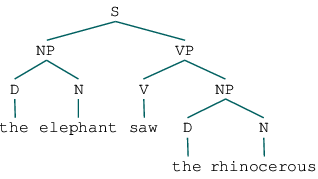

In [196]:
t3

The rendering options for trees rendered this way can be customized via `svgling.core.nltk_tree_options`, though I don't recommend messing with the spacing too much. This object is created as a default `svgling.core.TreeOptions()`, in case you need to reset it.

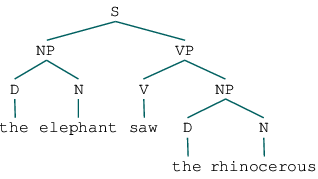

In [215]:
svgling.core.nltk_tree_options.leaf_nodes_align = True
t3

## Debug mode

Sometimes, if a tree is not rendering how you expect, it may be helpful to view it in debug mode; this draws an `em` grid along with boxes for each subtree to show how it is doing positioning. This is set with the `debug` value on options objects.

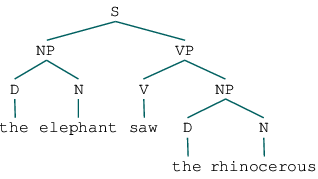

In [216]:
svgling.core.nltk_tree_options.debug = True
t3

## Further customization

Because of the nature of SVG, various aspects of trees are very easy to customize, and various things that would be nice to have are nonetheless extremely hard to do. Even things that aren't exposed in the `svgling` API may be pretty easy to do with some light under-the-hood customization of the tree rendering code. If you have specific requests, let me know.

Things that would be easy, if anyone actually wants them:
* change colors of text, have some nodes be italic/bolded
* change line stroke / width
* other graphical customization of what is currently rendered, SVG is pretty powerful.

Things that might be possible, but not easy:
* draw movement arrows (getting the `x` positions is tricky, but not impossible.)
* draw a triangle of laziness (I haven't implemented this yet just because my main use case is actual parsed data where you can't do this, but I probably will implement it). This is only tricky because it requires estimating text width accurately to look good.
* labels along edges? SVG has pretty good support for this but I don't (currently) know how to use it, so it might actually be easy.

Things that are quite hard, but desirable (most of these need multi-pass rendering to do right):
* resize trees based on actual node sizes.
* support complex (e.g. multi-line) nodes.
* put MathJax in nodes, perhaps using SVG `foreignObject`. Support `foreignObject` nodes in general. (This requires being able to calculate node sizes, too.)
* allow positioning of nodes or interactive trees via javascript.
* export to raster format. (Perhaps via inkscape?)
